In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# get number of files in each directory (train and validation directories, each have the subdirecories "dogs" and "cats")
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# variables for pre-processing and training
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
# create image generators
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(batch_size = batch_size,
                                                           directory = train_dir,
                                                           target_size = ((IMG_HEIGHT,IMG_WIDTH)),
                                                           class_mode = "binary")

val_data_gen = validation_image_generator.flow_from_directory(batch_size = batch_size,
                                                           directory = validation_dir,
                                                           target_size = ((IMG_HEIGHT,IMG_WIDTH)),
                                                           class_mode = "binary")
test_data_gen = test_image_generator.flow_from_directory(batch_size = batch_size,
                                                           directory = PATH,
                                                           target_size = ((IMG_HEIGHT,IMG_WIDTH)),
                                                           class_mode = "binary",
                                                           classes=['test'],
                                                           shuffle = False)

In [ ]:
# function to plot images
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [ ]:
# add transformations to the images to create more training data from existing training examples
train_image_generator = ImageDataGenerator(rescale=1./255,
                                           rotation_range=30,
                                           width_shift_range=0.1,
                                           height_shift_range=0.1,
                                           shear_range=0.1,
                                           zoom_range=0.2,
                                           horizontal_flip=True,
                                           fill_mode='nearest')

In [ ]:
# plot a single image different times using different variations
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [ ]:
# create and compile a model for the neural network
model=Sequential()

model.add(Conv2D(16, 3, activation ='relu', input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D(2))

model.add(Conv2D(32, 3, activation = 'relu'))
model.add(MaxPooling2D(2))

model.add(Conv2D(64, 3, activation ='relu'))
model.add(MaxPooling2D(2))

model.add(Conv2D(128, 3, activation ='relu'))
model.add(MaxPooling2D(2))

model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation ='relu'))
model.add(Dense(1, activation ='sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# use the fit method to train the network
step_size_train = total_train // batch_size
step_size_valid = total_val // batch_size

history = model.fit(x = train_data_gen,
                    steps_per_epoch = step_size_train,
                    epochs = epochs,
                    validation_data = val_data_gen,
                    validation_steps = step_size_valid)

Epoch 1/15
15/15 [==============================] - 43s 918ms/step - loss: 0.6962 - accuracy: 0.5101 - val_loss: 0.6852 - val_accuracy: 0.4989
Epoch 2/15
15/15 [==============================] - 14s 949ms/step - loss: 0.6830 - accuracy: 0.5540 - val_loss: 0.6511 - val_accuracy: 0.6384
Epoch 3/15
15/15 [==============================] - 15s 1s/step - loss: 0.6577 - accuracy: 0.5978 - val_loss: 0.6659 - val_accuracy: 0.5781
Epoch 4/15
15/15 [==============================] - 17s 1s/step - loss: 0.6585 - accuracy: 0.5962 - val_loss: 0.7110 - val_accuracy: 0.5257
Epoch 5/15
15/15 [==============================] - 15s 1s/step - loss: 0.6647 - accuracy: 0.6100 - val_loss: 0.6260 - val_accuracy: 0.6574
Epoch 6/15
15/15 [==============================] - 15s 988ms/step - loss: 0.6345 - accuracy: 0.6480 - val_loss: 0.6266 - val_accuracy: 0.6585
Epoch 7/15
15/15 [==============================] - 14s 955ms/step - loss: 0.6182 - accuracy: 0.6736 - val_loss: 0.6064 - val_accuracy: 0.6752
Epoch 8/

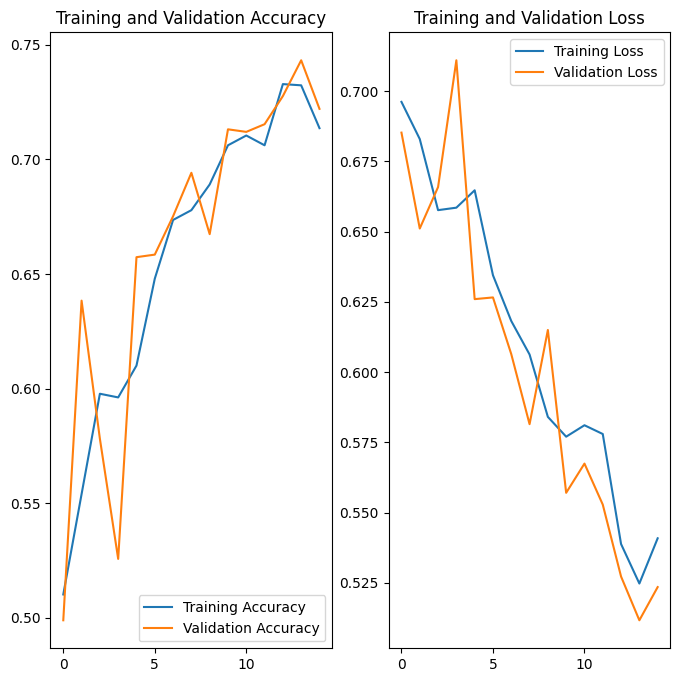

In [ ]:
# visualize the accuracy and loss of the model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 0s 100ms/step


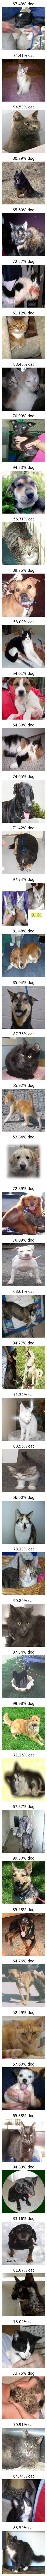

In [ ]:
# get the probability that each test image is a dog or a cat
sample_testing_images, _ = next(test_data_gen)
probabilities = model.predict(test_data_gen)
probabilities = probabilities.reshape(-1)
probabilities = probabilities.tolist()
plotImages(sample_testing_images, probabilities=probabilities)

In [ ]:
# check if the challenge is passed
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 78.0% of the images of cats and dogs.
You passed the challenge!
